In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [3]:
class Adaboost:
    def __init__(self, n_clf):
        self.alphas = None
        self.weights = None
        self.decisionStumps = None
        self.n_clf = n_clf
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        #initilize initial values
        self.weights = np.zeros(shape=(self.n_clf, n_samples))
        self.alphas = np.zeros(shape=self.n_clf)
        self.decisionStumps = []
        self.weights[0] = np.ones(shape=n_samples) / n_samples
        
        for i in range(self.n_clf):
            cur_weight = self.weights[i]
            
            decisionStump = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
            decisionStump.fit(X,y, sample_weight= cur_weight)
            
            predictions = decisionStump.predict(X)
            error = cur_weight[(predictions != y)]
            error = sum(error)
            
            alpha = 0.5 * np.log((1.0 - error) / (error))
            
            new_weight = cur_weight * np.exp(-alpha * y * predictions)
            new_weight /= np.sum(new_weight)
            
            #update alpha
            self.alphas[i] = alpha
            self.decisionStumps.append(decisionStump)
            #adding new weight for the next clf
            if (i+1) < self.n_clf:
                self.weights[i+1] = new_weight

    def predict(self, X):
        h = []
        for i in range(len(self.decisionStumps)):
            h.append(self.alphas[i] * self.decisionStumps[i].predict(X))
        sum_ = np.sum(h, axis = 0)
        return np.sign(sum_)


In [4]:
df = pd.read_csv('wdbc_data.csv')

y = df.iloc[:,1]
y = np.array(y)
y[y=='M'] = -1
y[y=='B'] = 1
y=y.astype('int')
X = df.iloc[:, 2:]
X = np.array(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = (1 - 300/len(y)), random_state=5)




## Written Adaboost

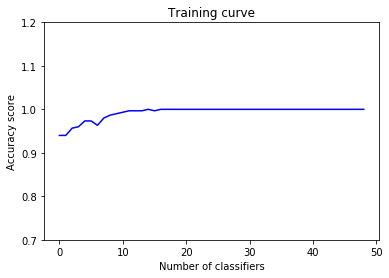

accuracy score 1.0


In [5]:
acc_scores = []

for n_clf in range(1,50):
    clf = Adaboost(n_clf = n_clf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    acc_scores.append(acc)
plt.plot(acc_scores,'-b')
plt.ylim(0.7,1.2)
plt.title('Training curve')
plt.xlabel('Number of classifiers')
plt.ylabel('Accuracy score')
plt.show()
print("accuracy score", acc)

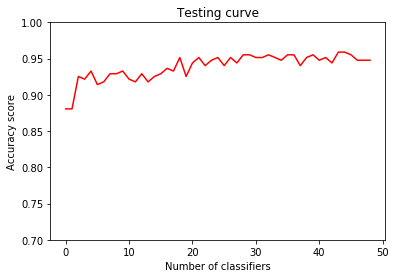

accuracy score 0.9477611940298507


In [6]:
acc_scores = []

for n_clf in range(1,50):
    clf = Adaboost(n_clf = n_clf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_scores.append(acc)
plt.plot(acc_scores,'-r')
plt.ylim(0.7,1)
plt.title('Testing curve')
plt.xlabel('Number of classifiers')
plt.ylabel('Accuracy score')
plt.show()
print("accuracy score", acc)

## Inbuilt - Adaboost library

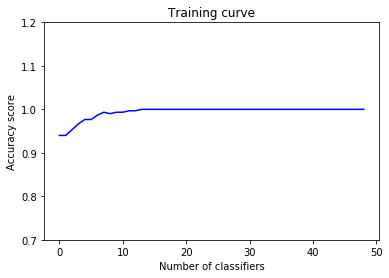

accuracy score 1.0


In [7]:
acc_scores = []

for n_clf in range(1,50):
    inbuild_adaboost = AdaBoostClassifier (n_estimators=n_clf, learning_rate=1)
    inbuild_adaboost.fit(X_train, y_train)
    y_pred = inbuild_adaboost.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    acc_scores.append(acc)
plt.plot(acc_scores,'-b')
plt.ylim(0.7,1.2)
plt.title('Training curve')
plt.xlabel('Number of classifiers')
plt.ylabel('Accuracy score')
plt.show()
print("accuracy score", acc)

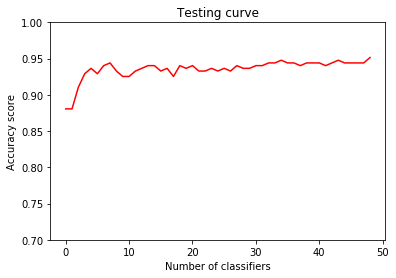

accuracy score 0.9514925373134329


In [8]:
acc_scores = []

for n_clf in range(1,50):
    inbuild_adaboost = AdaBoostClassifier (n_estimators=n_clf, learning_rate=1)
    inbuild_adaboost.fit(X_train, y_train)
    y_pred = inbuild_adaboost.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_scores.append(acc)
plt.plot(acc_scores,'-r')
plt.ylim(0.7,1)
plt.title('Testing curve')
plt.xlabel('Number of classifiers')
plt.ylabel('Accuracy score')
plt.show()
print("accuracy score", acc)

## Adaboost with different base clf

In [9]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

logRegBoost = AdaBoostClassifier(n_estimators=50, learning_rate=1, base_estimator= logReg)
logRegBoost.fit(X_train, y_train)
accuracy_score(y_test, logRegBoost.predict(X_test))



/home/quanghien/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/quanghien/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/quanghien/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/quanghien/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/quanghien/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

0.9477611940298507

## Adaboost comparing with SVM

In [12]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(X_train, y_train)

accuracy_score(y_test, clf_svm.predict(X_test))


0.9477611940298507